<a href="https://colab.research.google.com/github/avidp007/Brain-Tumor/blob/Brain_Tumor_Detection-Model/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Brain Tumor'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (598).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (620).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (449).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (556).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (28).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (258).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (513).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (235).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (228).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (238).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (230).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (146).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (117).jpg
/content/drive/MyDrive/Brain Tumor/Training/glioma_tumor/gg (261).jpg
/content/drive/MyDriv

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain Tumor/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain Tumor/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3266, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 28s 129ms/step - loss: 2.1689 - accuracy: 0.2991 - val_loss: 1.3637 - val_accuracy: 0.3027
Epoch 2/20
83/83 [==============================] - 8s 94ms/step - loss: 1.2214 - accuracy: 0.4469 - val_loss: 1.0749 - val_accuracy: 0.5068
Epoch 3/20
83/83 [==============================] - 8s 97ms/step - loss: 0.9820 - accuracy: 0.5766 - val_loss: 0.8967 - val_accuracy: 0.6259
Epoch 4/20
83/83 [==============================] - 8s 96ms/step - loss: 0.8751 - accuracy: 0.6280 - val_loss: 0.8644 - val_accuracy: 0.5816
Epoch 5/20
83/83 [==============================] - 8s 97ms/step - loss: 0.7785 - accuracy: 0.6779 - val_loss: 0.7178 - val_accuracy: 0.7109
Epoch 6/20
83/83 [==============================] - 8s 96ms/step - loss: 0.6787 - accuracy: 0.7059 - val_loss: 0.5886 - val_accuracy: 0.7211
Epoch 7/20
83/83 [==============================] - 8s 96ms/step - loss: 0.6178 - accuracy: 0.7516 - val_loss: 0.5703 - val_accuracy: 0.7483
Epoch 8/20


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

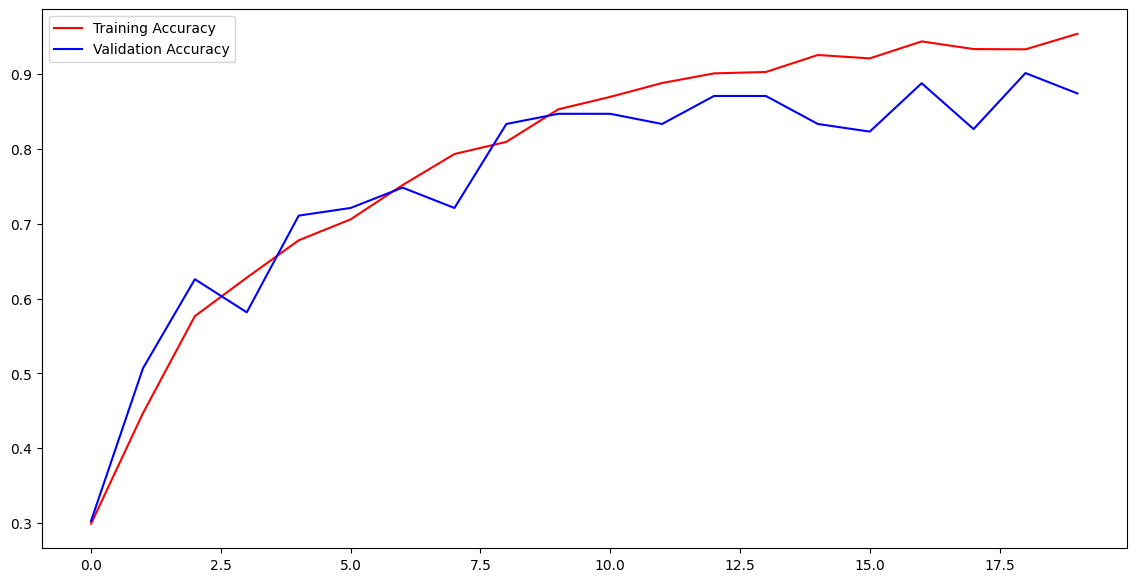

In [ ]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

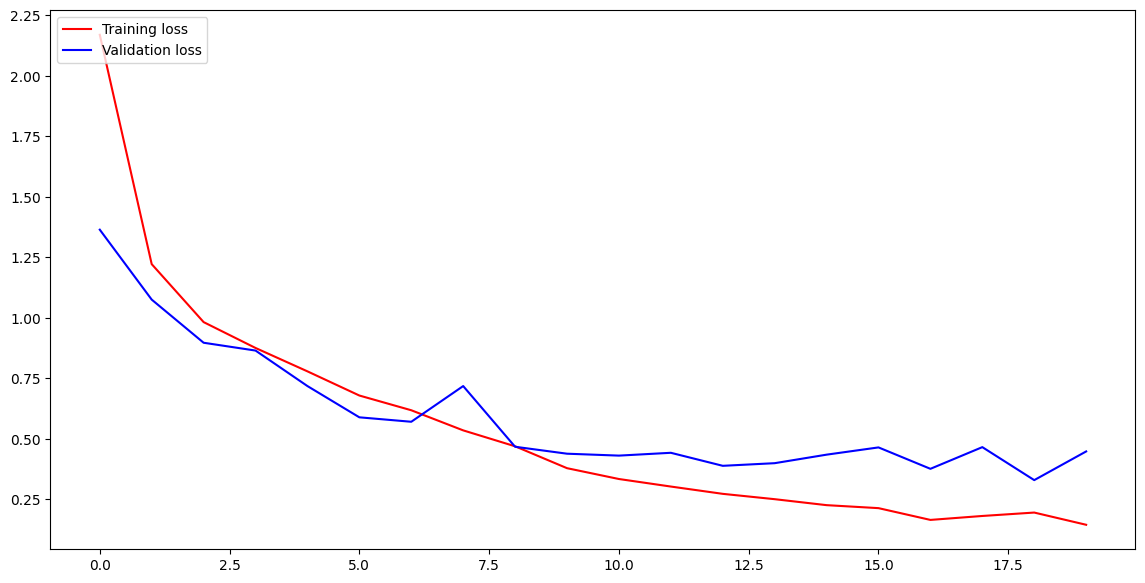

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

**PREDICTION**








In [ ]:
img = cv2.imread('/content/drive/MyDrive/Brain Tumor/Testing/meningioma_tumor/image(106).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

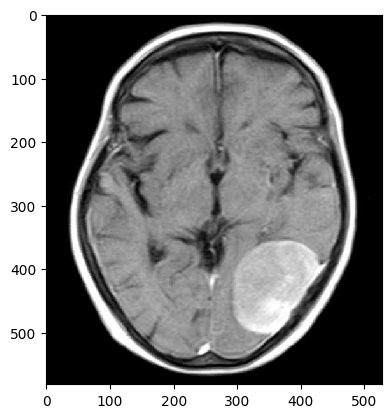

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Brain Tumor/Testing/meningioma_tumor/image(106).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 572ms/step


1